In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
#from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
#from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("aps_failure_training_reduced.csv",na_values="na")

In [3]:
df.head()

,_id,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6350fbf399c9efe2fcf2304b,pos,785270,NaN,NaN,8994.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,6350fc2f99c9efe2fcf23053,pos,341996,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,4468102.0,1422974.0,3581324.0,2990914.0,1580312.0,444932.0,74578.0,1048.0,0.0,0.0
2,6350fc2f99c9efe2fcf23050,pos,870472,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,7888300.0,3858578.0,9746626.0,9874312.0,4541826.0,2094152.0,1749098.0,23252.0,NaN,NaN
3,6350fc2f99c9efe2fcf23055,pos,792676,NaN,2616.0,NaN,0.0,0.0,0.0,0.0,...,13038058.0,9275202.0,13791348.0,69876.0,6898.0,2858.0,2724.0,54.0,0.0,0.0
4,6350fc2f99c9efe2fcf2305e,pos,586792,NaN,NaN,NaN,NaN,NaN,0.0,3180.0,...,5345310.0,1897616.0,3726742.0,8570962.0,5767870.0,397366.0,34768.0,0.0,NaN,NaN


In [4]:
df.shape

(35001, 172)

In [5]:
df = df.drop(["_id"],axis = 1)

In [6]:
df.shape

(35001, 171)

In [7]:
df["class"].value_counts()

neg    34017
pos      984
Name: class, dtype: int64

In [8]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

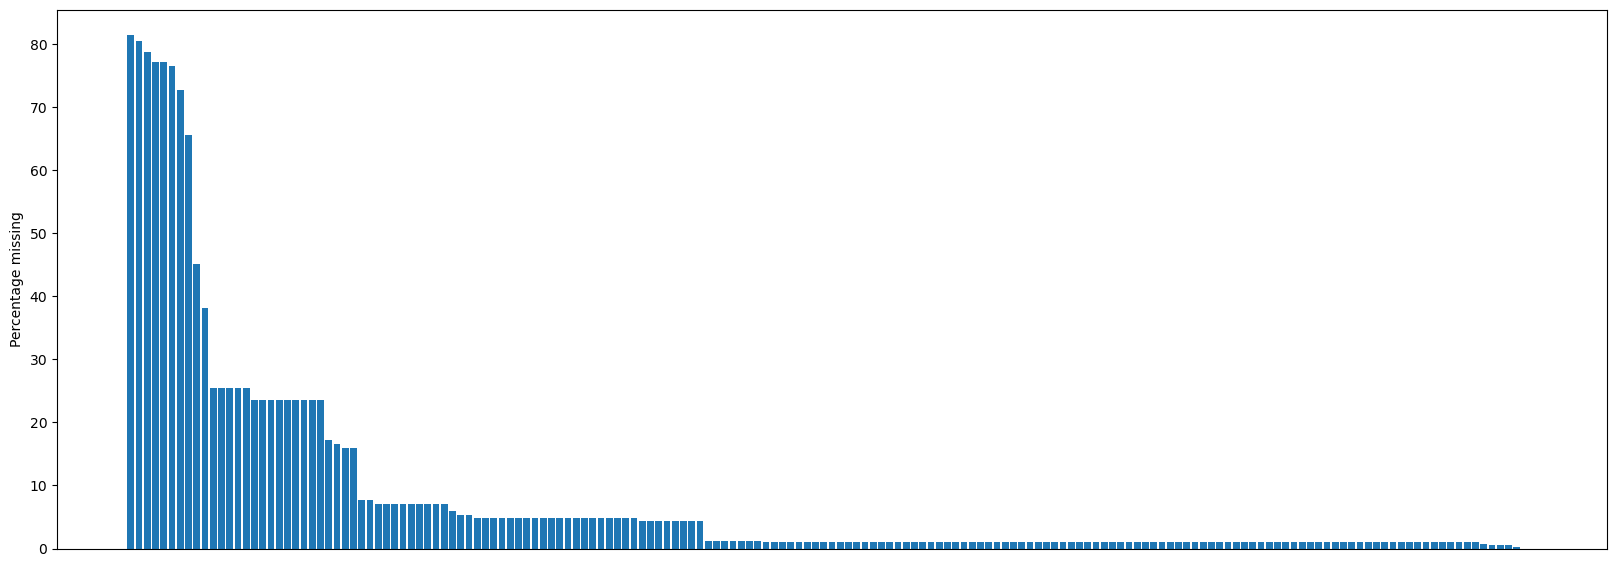

In [9]:
fig, ax = plt.subplots(figsize=(20,7))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [10]:
missing

,0
br_000,81.354818
bq_000,80.449130
bp_000,78.729179
ab_000,77.097797
cr_000,77.097797
...,...
cj_000,0.557127
ci_000,0.557127
bt_000,0.239993
aa_000,0.000000


In [11]:
drop_columns = missing[missing[0]>70]
drop_columns.index

Index(['br_000', 'bq_000', 'bp_000', 'ab_000', 'cr_000', 'bo_000', 'bn_000'], dtype='object')

In [12]:
df.drop(list(drop_columns.index) , axis=1 , inplace = True)

In [13]:
df.shape

(35001, 164)

In [14]:
(df.isna().sum().sum() / np.product(df.shape))*100

5.387598681849508

Positive: 984, Negative: 34017


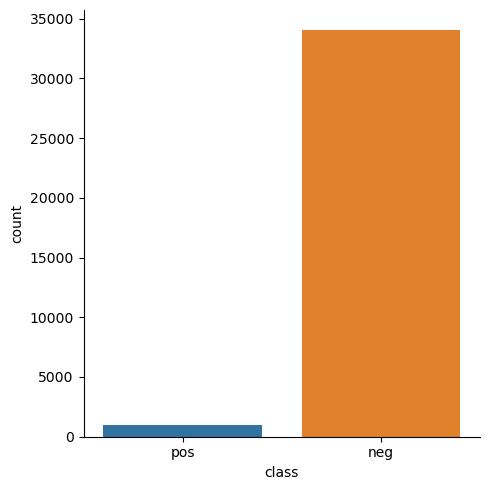

In [20]:
pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="class", kind="count")
plt.show()

## Functions for model training and evaluation

In [24]:
def evaluation_clf(true,predicted):
    accuracy_score = accuracy_score(true, predicted)
    precision_score = precision_score(true,predicted)
    recall_score  = recall_score(true,predicted)
    f1_score = f1_score(true,predicted)
    roc_auc_score = roc_auc_score(true,predicted)
    
    return accuracy_score , precision_score , recall_score , f1_score , roc_auc_score

In [25]:
def total_cost(true , predicted):
    tp,fp,fn,tp = confusion_matrix(true,predicted).ravel()
    
    cost = 10*fp + 500*fn
    
    return cost

In [26]:
def evaluate_models(x,y,model):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train,y_train)
        
        y_train_predicted = model.predict(x_train)
        y_test_predicted = model.predict(x_test)
        
        train_accuracy , train_precision_score , train_recall_score , train_f1_score , train_roc_auc_score = evaluation_clf(y_train,y_train_predicted)
        train_cost = total_cost(y_train,y_train_predicted)
        
        test_accuracy , test_precision_score , test_recall_score , test_f1_score , test_roc_auc_score = evaluation_clf(y_test,y_test_predicted)
        test_cost = total_cost(y_test,y_test_predicted)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(train_accuracy))
        print('- F1 score: {:.4f}'.format(train_f1_score)) 
        print('- Precision: {:.4f}'.format(train_precision_score))
        print('- Recall: {:.4f}'.format(train_recall_score))
        print('- Roc Auc Score: {:.4f}'.format(train_roc_auc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(test_accuracy))
        print('- F1 score: {:.4f}'.format(test_f1_score))
        print('- Precision: {:.4f}'.format(test_precision_score))
        print('- Recall: {:.4f}'.format(test_recall_score))
        print('- Roc Auc Score: {:.4f}'.format(test_roc_auc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report
    